In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("c:/cook/titanic/train.csv")
test = pd.read_csv("c:/cook/titanic/test.csv")

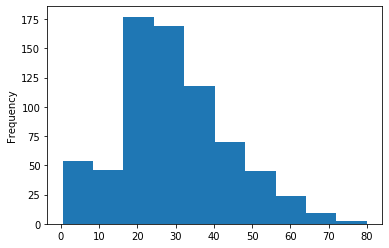

In [3]:
df['Age'].plot(kind="hist")

([array([468., 109.]), array([549., 342.])],
 array([0. , 0.5, 1. ]),
 <a list of 2 Lists of Patches objects>)

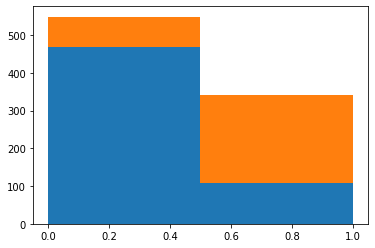

In [4]:
plt.hist([df['Survived'][df['Sex']=='male'], df['Survived'][df['Sex']=='female']], stacked = True, bins = 2)

In [5]:
df_S = df[df['Survived'] == 1]
df_D = df[df['Survived'] == 0]
x_1 = df_S['Sex'].value_counts()
x_2 = df_D['Sex'].value_counts()

In [6]:
x_1

female    233
male      109
Name: Sex, dtype: int64

In [7]:
x_2

male      468
female     81
Name: Sex, dtype: int64

In [8]:
df_t = pd.DataFrame(data = {"Survived" : x_1, "Dead" : x_2})

In [9]:
df_t = pd.DataFrame([x_1,x_2])

df_t

,female,male
Sex,233,109
Sex,81,468


In [10]:
df_t.index = ["Survived", "Dead"]

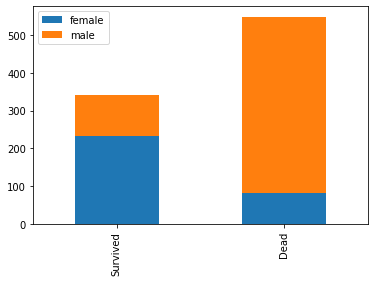

In [11]:
df_t.plot(kind="bar", stacked = True)

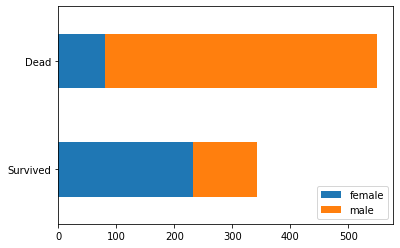

In [12]:
df_t.plot(kind="barh", stacked = True)

pclass 생존유무

In [13]:
def bar_char(feature):
    x_1 = df[df['Survived'] == 1][feature].value_counts()
    x_2 = df[df['Survived'] == 0][feature].value_counts()
    df_t = pd.DataFrame([x_1,x_2])
    df_t.index = ["Survived","Dead"]
    print(df_t)
    df_t.plot(kind="bar", stacked = True, title="{0}".format(feature))

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

            1   2    3
Survived  136  87  119
Dead       80  97  372
          female  male
Survived     233   109
Dead          81   468
              0     1     2    3    4    5    6
Survived  233.0  65.0  40.0  3.0  NaN  1.0  NaN
Dead      445.0  53.0  40.0  2.0  4.0  4.0  1.0
            S   C   Q
Survived  217  93  30
Dead      427  75  47


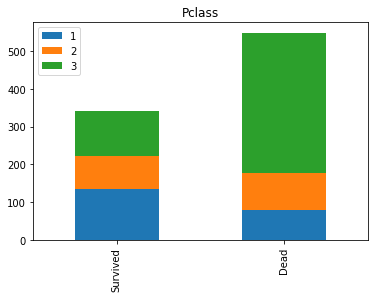

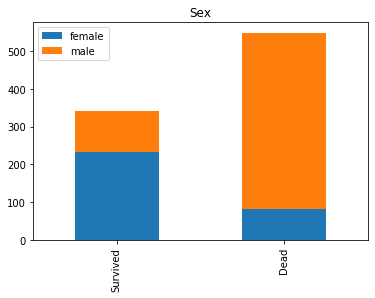

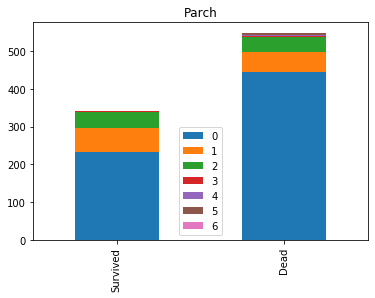

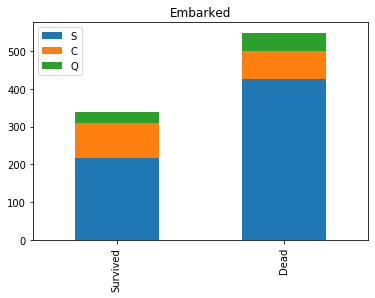

In [15]:
for i in df.columns[[2,4,7,11]]:
    bar_char(i)

In [16]:
train_test_data = [df, test]
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [18]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3,
                 "Col": 3, "Major":3, "Mile":3, "Countess":3, "Ms":3, 
                 "Lady":3, "Jonkheer":3, "Don":3, "Mme":3, "Capt":3, "Sir":3}
for dataset in train_test_data:
    dataset['Title'] = dataset["Title"].map(title_mapping)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


          0.0  1.0  2.0  3.0
Survived   81  127   99   33
Dead      436   55   26   32


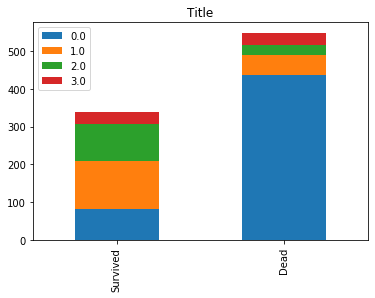

In [20]:
bar_char("Title")

In [21]:
df.drop('Name', axis=1, inplace = True)
test.drop('Name', axis=1, inplace = True)

In [22]:
df['Sex'] = pd.get_dummies(df['Sex'])['male']
test['Sex'] = pd.get_dummies(test['Sex'])['male']
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0.0


            0    1
Survived  233  109
Dead       81  468


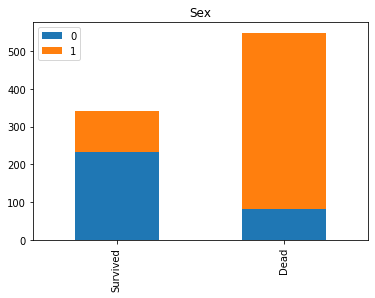

In [23]:
bar_char('Sex')

In [24]:
df['Age'].fillna(df.groupby("Title")["Age"].transform("median"),inplace=True)
test['Age'].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)

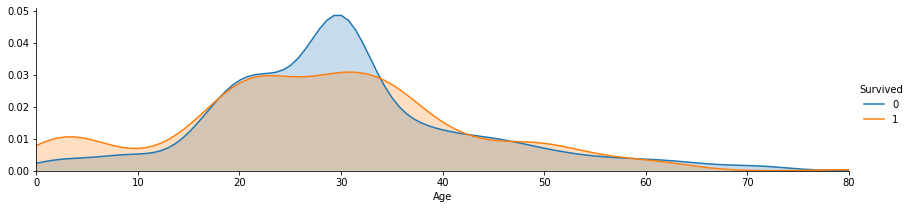

In [25]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.show()

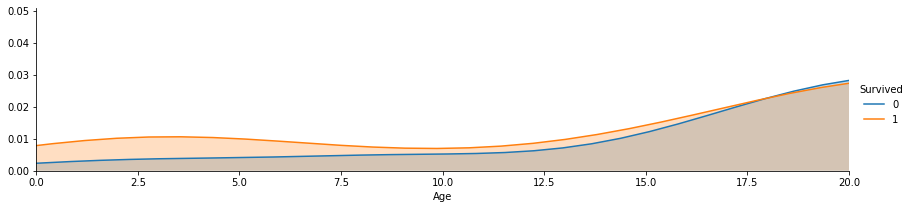

In [26]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(0,20)
plt.show()

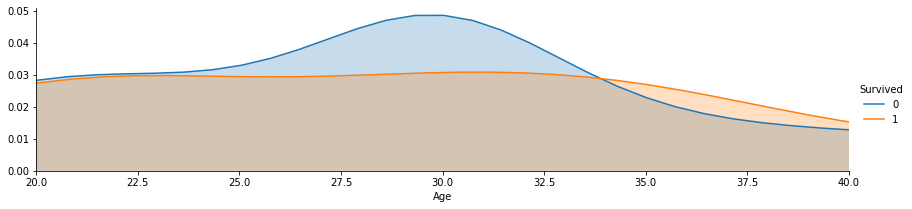

In [27]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(20,40)
plt.show()

age <= 16     => 0
16< age <= 26 => 1
26< age <= 36 => 2
36< age <= 62 => 3
62< age       => 4

In [28]:
for dataset in train_test_data:
    dataset.loc[dataset['Age']<= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16)&(dataset['Age']<=26), 'Age'] =1,
    dataset.loc[(dataset['Age'] > 26)&(dataset['Age']<=36), 'Age'] =2,
    dataset.loc[(dataset['Age'] > 36)&(dataset['Age']<=62), 'Age'] =3,
    dataset.loc[dataset['Age'] > 62, 'Age'] =4

In [29]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,1,2.0,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,0,3.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,1,3.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,1,2.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,0,1.0,1,1,3101298,12.2875,NaN,S,2.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,2.0,0,0,A.5. 3236,8.0500,NaN,S,0.0
414,1306,1,0,3.0,0,0,PC 17758,108.9000,C105,C,NaN
415,1307,3,1,3.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0.0
416,1308,3,1,2.0,0,0,359309,8.0500,NaN,S,0.0


          2.0  1.0  3.0  0.0  4.0
Survived  116   97   69   57    3
Dead      220  158  111   48   12


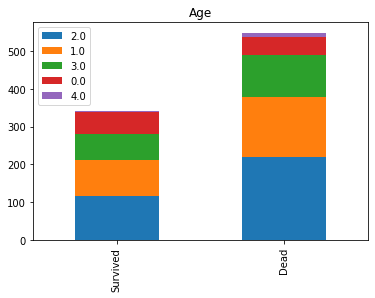

In [30]:
bar_char('Age')

In [31]:
Pclass1 =  df[df['Pclass']==1]['Embarked'].value_counts()
Pclass2 =  df[df['Pclass']==2]['Embarked'].value_counts()
Pclass3 =  df[df['Pclass']==3]['Embarked'].value_counts()

In [32]:
Pclass1

S    127
C     85
Q      2
Name: Embarked, dtype: int64

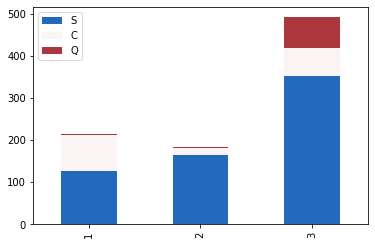

In [33]:
Pclass = pd.DataFrame([Pclass1, Pclass2, Pclass3])
Pclass.index = ['1','2','3']
Pclass.plot(kind="bar", stacked = True, colormap = 'vlag')

In [34]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,0,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,0,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,2.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,0,1.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,0,1.0,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,1,1.0,0,0,111369,30.0000,C148,C,0.0


In [35]:
df['Embarked'].isna().sum()

2

In [36]:
df.loc[df['Embarked'].isna()==True, 'Embarked'] = "S"

In [37]:
df.loc[pd.get_dummies(df['Embarked'])["C"] == 1,"Embarked"] = 0
df.loc[pd.get_dummies(df['Embarked'])["Q"] == 1, "Embarked"] = 1
df.loc[pd.get_dummies(df['Embarked'])["S"] == 1, "Embarked"] = 2

test.loc[pd.get_dummies(test['Embarked'])["C"] == 1,"Embarked"] = 0
test.loc[pd.get_dummies(test['Embarked'])["Q"] == 1, "Embarked"] = 1
test.loc[pd.get_dummies(test['Embarked'])["S"] == 1, "Embarked"] = 2

In [38]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            2
dtype: int64

In [39]:
df.loc[df['Title'].isna()==True, 'Title'] = 3

In [40]:
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"),inplace=True)
test.loc[test['Title'].isna()==True, 'Title'] = 3

In [41]:
test.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

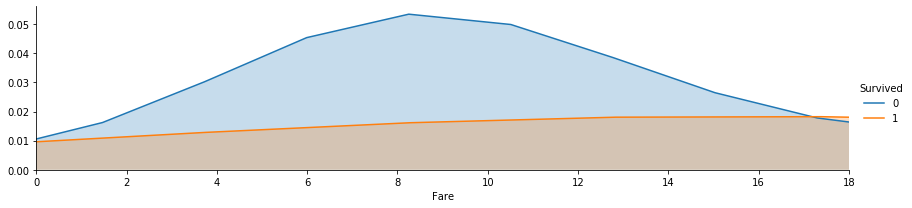

In [42]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Fare", shade=True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.xlim(0,18)
plt.show()

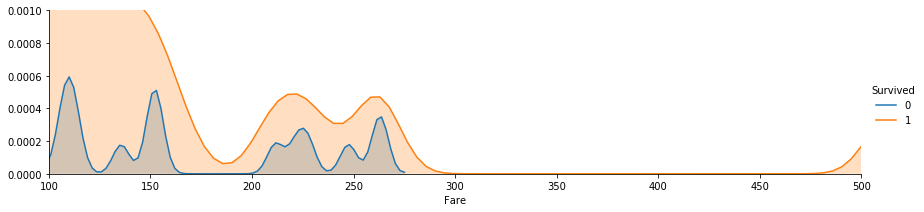

In [43]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Fare", shade=True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.xlim(100,500)
plt.ylim(0, 0.001)
plt.show()

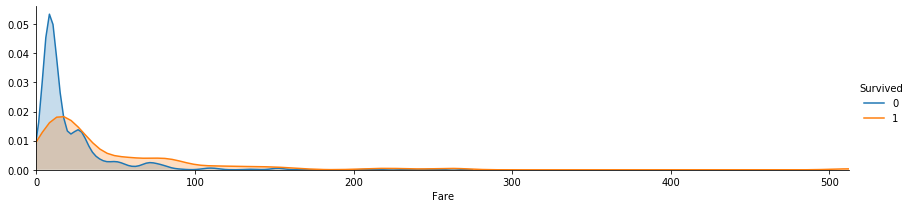

In [44]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Fare", shade=True)
facet.set(xlim=(0, df['Fare'].max()))
facet.add_legend()
plt.show()

In [45]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17)&(dataset['Fare']<=30), 'Fare'] =1,
    dataset.loc[(dataset['Fare'] > 30)&(dataset['Fare']<=100), 'Fare'] =2,
    dataset.loc[(dataset['Fare'] > 100), 'Fare'] =3,

In [46]:
df["Cabin"].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [47]:
df["Cabin"] = df["Cabin"].str.extract("([a-zA-Z])")

In [48]:
Pclass1 =  df[df['Pclass']==1]['Cabin'].value_counts()
Pclass2 =  df[df['Pclass']==2]['Cabin'].value_counts()
Pclass3 =  df[df['Pclass']==3]['Cabin'].value_counts()

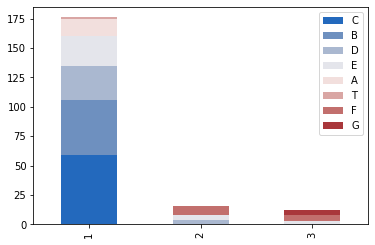

In [49]:
Pclass = pd.DataFrame([Pclass1, Pclass2, Pclass3])
Pclass.index = ['1','2','3']
Pclass.plot(kind="bar", stacked = True, colormap = 'vlag')

In [50]:
cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2.0, "G":2.4, "H":2.8}

for dataset in train_test_data:
    dataset['Cabin'] = dataset["Cabin"].map(cabin_mapping)

In [51]:
df["Cabin"].fillna(df.groupby(df['Pclass'])["Cabin"].transform("median"),inplace=True)
test["Cabin"].fillna(df.groupby(df['Pclass'])["Cabin"].transform("median"),inplace=True)

In [52]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

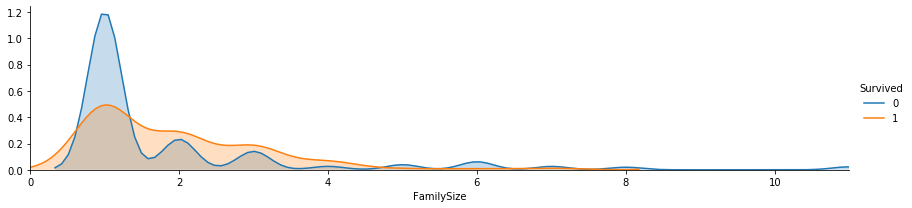

In [53]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "FamilySize", shade=True)
facet.set(xlim=(0, df['FamilySize'].max()))
facet.add_legend()
plt.show()

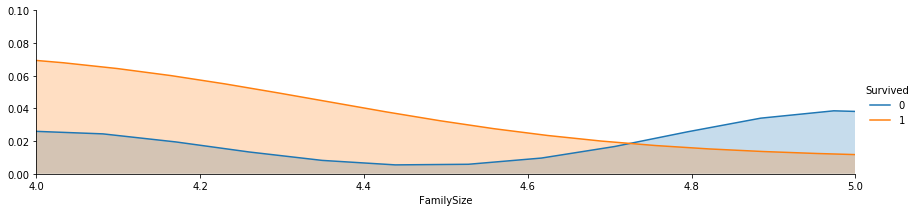

In [54]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "FamilySize", shade=True)
facet.set(xlim=(0, df['FamilySize'].max()))
facet.add_legend()
plt.xlim(4,5)
plt.ylim(0, 0.1)
plt.show() #0.6 1.3 4.7

In [55]:
# for dataset in train_test_data:
#     dataset.loc[dataset['FamilySize']<= 0.6, 'FamilySize'] = 0,
#     dataset.loc[(dataset['FamilySize'] > 0.6)&(dataset['FamilySize']<=1.3), 'FamilySize'] =1,
#     dataset.loc[(dataset['FamilySize'] > 1.3)&(dataset['FamilySize']<=4.7), 'FamilySize'] =2,
#     dataset.loc[(dataset['FamilySize'] > 4.7), 'Fare'] =3,

In [56]:
for dataset in train_test_data:
    dataset['FamilySize'] = (dataset['FamilySize'] - 1) * 0.4

In [57]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,1,1.0,1,0,A/5 21171,0.0,2.0,2,0.0,0.4
1,2,1,1,0,3.0,1,0,PC 17599,2.0,0.8,0,2.0,0.4
2,3,1,3,0,1.0,0,0,STON/O2. 3101282,0.0,2.0,2,1.0,0.0
3,4,1,1,0,2.0,1,0,113803,2.0,0.8,2,2.0,0.4
4,5,0,3,1,2.0,0,0,373450,0.0,2.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,2.0,0,0,211536,0.0,1.8,2,3.0,0.0
887,888,1,1,0,1.0,0,0,112053,1.0,0.4,2,1.0,0.0
888,889,0,3,0,1.0,1,2,W./C. 6607,1.0,2.0,2,1.0,1.2
889,890,1,1,1,1.0,0,0,111369,1.0,0.8,0,0.0,0.0


In [58]:
df.drop(['PassengerId', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace = True)
test.drop(['PassengerId', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace = True)

In [59]:
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,1,1.0,0.0,2.0,2,0.0,0.4
1,1,1,0,3.0,2.0,0.8,0,2.0,0.4
2,1,3,0,1.0,0.0,2.0,2,1.0,0.0
3,1,1,0,2.0,2.0,0.8,2,2.0,0.4
4,0,3,1,2.0,0.0,2.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,2.0,0.0,1.8,2,3.0,0.0
887,1,1,0,1.0,1.0,0.4,2,1.0,0.0
888,0,3,0,1.0,1.0,2.0,2,1.0,1.2
889,1,1,1,1.0,1.0,0.8,0,0.0,0.0


In [60]:
test

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,1,2.0,0.0,2.0,1,0.0,0.0
1,3,0,3.0,0.0,0.8,2,2.0,0.4
2,2,1,3.0,0.0,2.0,1,0.0,0.0
3,3,1,2.0,0.0,0.8,2,0.0,0.0
4,3,0,1.0,0.0,2.0,2,2.0,0.8
...,...,...,...,...,...,...,...,...
413,3,1,2.0,0.0,1.8,2,0.0,0.0
414,1,0,3.0,3.0,2.0,0,3.0,0.0
415,3,1,3.0,0.0,2.0,2,0.0,0.0
416,3,1,2.0,0.0,1.8,2,0.0,0.0


In [61]:
df.to_csv("prep_train.csv", index= False)
test.to_csv("prep_test.csv", index= False)